# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [63]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import urllib.parse
from scipy.stats import linregress
from api_keys import g_key

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [64]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [65]:
#generate random list for latitudes and longitudes 

latitude = []
longitude = []
max_num=50
for each_lat in np.random.randint(-90,90,max_num):
    latitude.append(each_lat)

for each_lon in np.random.randint(-180,180,max_num):
    longitude.append(each_lon)
len(longitude)

50

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [66]:
latitude_and_Longitude=tuple(zip(latitude,longitude))
latitude_and_Longitude

((-53, -81),
 (-8, -23),
 (-89, -59),
 (-89, 90),
 (-86, 155),
 (-70, 90),
 (26, 31),
 (-48, 64),
 (39, -81),
 (-68, -5),
 (45, 132),
 (-44, -135),
 (10, 40),
 (-49, -33),
 (63, 56),
 (64, 83),
 (-75, 150),
 (-7, -20),
 (-77, -158),
 (-13, -80),
 (57, -64),
 (42, -112),
 (46, -57),
 (-57, 178),
 (77, -30),
 (22, 120),
 (-47, -94),
 (-19, -11),
 (-76, -12),
 (-40, 168),
 (-14, 57),
 (89, -180),
 (-41, 77),
 (7, 139),
 (-61, 109),
 (-58, 30),
 (86, 104),
 (-65, 14),
 (78, 110),
 (55, 155),
 (4, -169),
 (-57, -112),
 (-57, 177),
 (81, 126),
 (-52, 3),
 (1, 151),
 (86, -147),
 (-59, -24),
 (-52, -2),
 (-89, 179))

In [67]:
cities = []
country = []

for lat,lon in latitude_and_Longitude:
    city = citipy.nearest_city(lat,lon)
    
    cityName = city.city_name
    
    cities.append(cityName)
    
    country.append(city.country_code)
    
print('The above script has generated {} different cities using random numbers.'.format(len(set(cities))))

The above script has generated 43 different cities using random numbers.


In [68]:
#create a dataframe to store all the cities and countries generated with citipy

df_countriesf_countries = pd.DataFrame({'Cities': cities,
              'Country': country})

#add additional blank columns to store information from openweathermap api

df_countriesf_countries['Latitude'] = ''
df_countriesf_countries['Longitude'] = ''
df_countriesf_countries['Temperature (F)'] = ''
df_countriesf_countries['Humidity (%)'] = ''
df_countriesf_countries['Cloudiness (%)'] = ''
df_countriesf_countries['Wind Speed (mph)'] = ''
df_countriesf_countries['returncode'] = ''
df_countriesf_countries['Max Temp (F)'] = ''


#df_countries = df_countries.drop_duplicates(subset=['Cities'],keep='first')
df_countriesf_countries.head()

,Cities,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),returncode,Max Temp (F)
0,punta arenas,cl,,,,,,,,
1,georgetown,sh,,,,,,,,
2,ushuaia,ar,,,,,,,,
3,albany,au,,,,,,,,
4,bluff,nz,,,,,,,,


In [69]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
count = 0
#df_countriesf_countries['latitude'] = ""
#df_countriesf_countries['temperature'] = ""
#df_countriesf_countries['humidity'] = ""
#df_countriesf_countries['cloudiness'] = ""
#df_countriesf_countries['wind_speed'] = ""
df_countriesf_countries['returncode'] = ""
#df_countriesf_countries['Longitude'] = ""
for index,row in df_countriesf_countries.iterrows():
    count += 1
    query_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + urllib.parse.quote(row['Cities']) + "," +urllib.parse.quote(row['Country'])
    
    print(f"{query_url}\n{count} index {index} ")
    try:
        weather_response = requests.get(query_url)
        cityweather = weather_response.json()
        #print(f"hi there {query_url}")
        #if count < 5 : 
        #print(f" ha ha {cityweather}")
        #df_countriesf_countries
        retCode=weather_response.status_code
        #print()
        #print(f" this is it {retCode}")
        df_countriesf_countries['returncode'][index] = str(retCode)
        if int(retCode) == 200: 
            df_countriesf_countries['Latitude'][index] = cityweather['coord']['lat']
            df_countriesf_countries['Longitude'][index] = cityweather['coord']['lon']
            df_countriesf_countries['Temperature (F)'][index] = cityweather['main']['temp']
            df_countriesf_countries['Humidity (%)'][index] = cityweather['main']['humidity']
            df_countriesf_countries['Cloudiness (%)'][index] = cityweather['clouds']['all']
            df_countriesf_countries['Wind Speed (mph)'][index] = cityweather['wind']['speed']
            df_countriesf_countries['Max Temp (F)'][index] = cityweather['main']['temp_max']

        else:
            print(f" {retCode} is not 200 ")
        
    except requests.exceptions.HTTPError as e:
        print(f"No data for this city: {row['city']} returned code {e}")
indexNames = df_countriesf_countries[( df_countriesf_countries['Latitude'] == '' ) | ( df_countriesf_countries['returncode'] != '200' ) ].index
#df_countriesf_countries.drop(indexNames , inplace=True)        
df_countriesf_countries.head()

http://api.openweathermap.org/data/2.5/weather?appid=8bb4902534e8ff56223facbbe3b7bb1f&units=Imperial&q=punta%20arenas,cl
1 index 0 
http://api.openweathermap.org/data/2.5/weather?appid=8bb4902534e8ff56223facbbe3b7bb1f&units=Imperial&q=georgetown,sh
2 index 1 
http://api.openweathermap.org/data/2.5/weather?appid=8bb4902534e8ff56223facbbe3b7bb1f&units=Imperial&q=ushuaia,ar
3 index 2 
http://api.openweathermap.org/data/2.5/weather?appid=8bb4902534e8ff56223facbbe3b7bb1f&units=Imperial&q=albany,au
4 index 3 
http://api.openweathermap.org/data/2.5/weather?appid=8bb4902534e8ff56223facbbe3b7bb1f&units=Imperial&q=bluff,nz
5 index 4 
http://api.openweathermap.org/data/2.5/weather?appid=8bb4902534e8ff56223facbbe3b7bb1f&units=Imperial&q=busselton,au
6 index 5 
http://api.openweathermap.org/data/2.5/weather?appid=8bb4902534e8ff56223facbbe3b7bb1f&units=Imperial&q=sohag,eg
7 index 6 
http://api.openweathermap.org/data/2.5/weather?appid=8bb4902534e8ff56223facbbe3b7bb1f&units=Imperial&q=saint-philippe,

,Cities,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),returncode,Max Temp (F)
0,punta arenas,cl,-53.15,-70.92,49.46,87,34,2.24,200,50
1,georgetown,sh,-7.93,-14.42,80.22,71,64,12.91,200,80.22
2,ushuaia,ar,-54.8,-68.3,57.7,51,94,20.8,200,59
3,albany,au,-35.02,117.89,57.2,100,2,1.12,200,57.2
4,bluff,nz,-46.6,168.33,48.99,92,99,7,200,48.99


In [70]:
# 
df_filterd=df_countriesf_countries[df_countriesf_countries['returncode'] == '200']
df_filterd.head()

,Cities,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),returncode,Max Temp (F)
0,punta arenas,cl,-53.15,-70.92,49.46,87,34,2.24,200,50
1,georgetown,sh,-7.93,-14.42,80.22,71,64,12.91,200,80.22
2,ushuaia,ar,-54.8,-68.3,57.7,51,94,20.8,200,59
3,albany,au,-35.02,117.89,57.2,100,2,1.12,200,57.2
4,bluff,nz,-46.6,168.33,48.99,92,99,7,200,48.99


In [71]:
#plt.clf()
from datetime import date

today = date.today()
print("Today's date:", today)

# Create function to display plot of various aspects
def my_plot(my_x,my_y,mydf):
    #plt.figure(figsize=(15,10))

    #########
    # Change the colun names from dataframe you can reuse the plot code for other fields from df_filterd
    x_one=my_x
    y_one=my_y
    ########## 
    scatter=plt.scatter(mydf[x_one], mydf[y_one], color='olivedrab',edgecolor='black', alpha=0.25)

    plt.ylim(2,105)
    plt.grid()
    plt.xlabel(x_one)
    plt.ylabel(y_one)
    plt.title(f'City {x_one} vs {y_one} ')
    plt.savefig(f"./Images/{x_one}_vs_{y_one}.png")
    plt.show()

Today's date: 2020-04-16


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

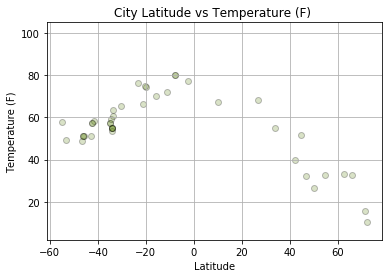

In [72]:
my_plot("Latitude","Temperature (F)",df_filterd)

#### Latitude vs. Humidity Plot

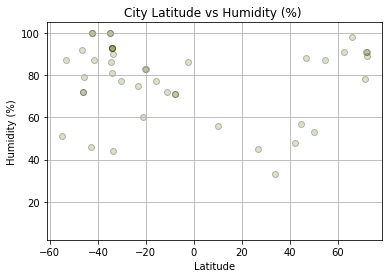

In [73]:
my_plot("Latitude","Humidity (%)",df_filterd)

#### Latitude vs. Cloudiness Plot

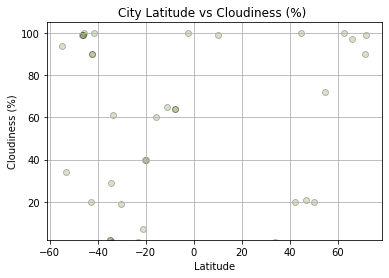

In [74]:
my_plot("Latitude","Cloudiness (%)",df_filterd)

#### Latitude vs. Wind Speed Plot

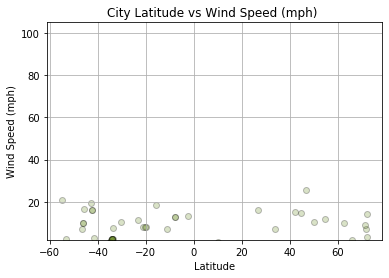

In [75]:
my_plot("Latitude","Wind Speed (mph)",df_filterd)

## Linear Regression

In [76]:
# OPTIONAL: Create a function to create Linear Regression plots
def regress_for_me_plese(my_x, my_y,mypd):
    plt.figure(figsize=(15,10))

    x_values = pd.to_numeric(mypd[my_x]).astype(float)
    y_values = pd.to_numeric(mypd[my_y]).astype(float)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"Regression line equation is: {line_eq}")
    plt.ylim(2,105)
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    
    print(min(mypd[my_x]))
    print(mypd.name)
    plt.annotate(f"{line_eq}",xy=(min(mypd[my_x])+10,min(mypd[my_y])+10),fontsize=15,color="red")
    plt.xlabel(f"{my_x}")
    plt.ylabel(f"{my_y}")
    plt.title(f"{my_x} v/s {my_y} {today} linear regression",fontsize=20)
    print(f"The r-squared is: {rvalue}")
    print(f"The regression displays a {'negative' if rvalue < 0 else 'positive'} correlation.")
    print(f"In the {mypd.name}, as you move away from the equator the '{my_y}' {'decreases' if rvalue < 0 else 'increase'}.")
    
    plt.grid()
    plt.title(f'Linear regression City {my_x} vs {my_y} ')
    plt.savefig(f"./Images/{mypd.name}_regression_{my_x}_vs_{my_y}.png")
    plt.show()

In [77]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = df_filterd.loc[pd.to_numeric(df_filterd["Latitude"]).astype(float) > 0, :]
northern_df.name = "Northern_Hemisphere"

southern_df = df_filterd.loc[pd.to_numeric(df_filterd["Latitude"]).astype(float) < 0, :]
southern_df.name = "Southern_Hemisphere"

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -1.09x + 90.36
9.98
Northern_Hemisphere
The r-squared is: -0.9108535315419979
The regression displays a negative correlation.
In the Northern_Hemisphere, as you move away from the equator the 'Max Temp (F)' decreases.


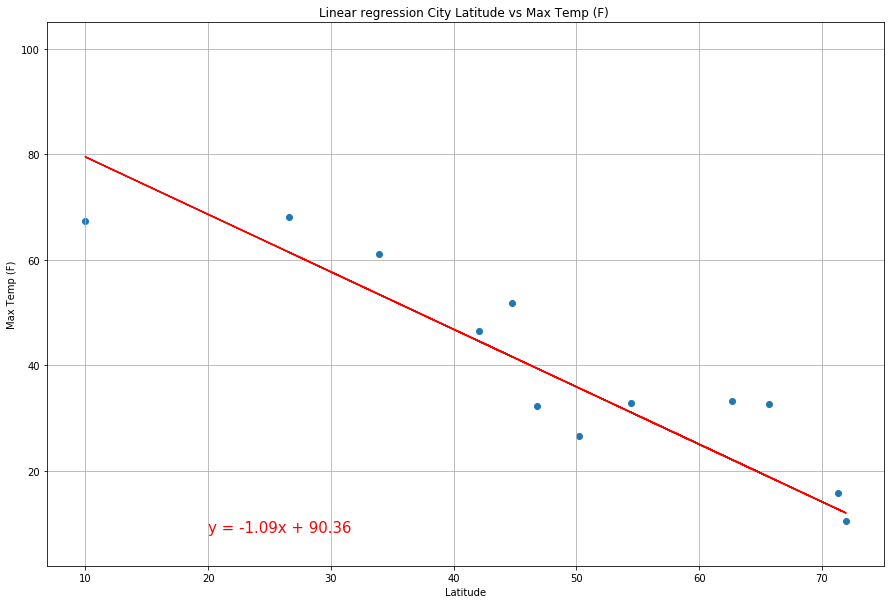

In [78]:
regress_for_me_plese("Latitude","Max Temp (F)",northern_df)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.63x + 82.96
-54.8
Southern_Hemisphere
The r-squared is: 0.904629020345988
The regression displays a positive correlation.
In the Southern_Hemisphere, as you move away from the equator the 'Max Temp (F)' increase.


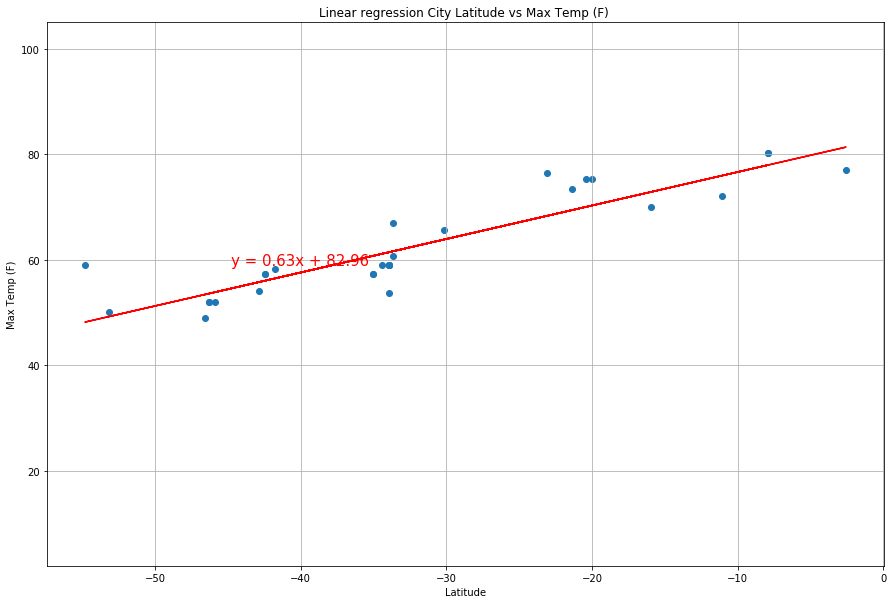

In [79]:
regress_for_me_plese("Latitude","Max Temp (F)",southern_df)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.87x + 26.77
9.98
Northern_Hemisphere
The r-squared is: 0.7624748433830554
The regression displays a positive correlation.
In the Northern_Hemisphere, as you move away from the equator the 'Humidity (%)' increase.


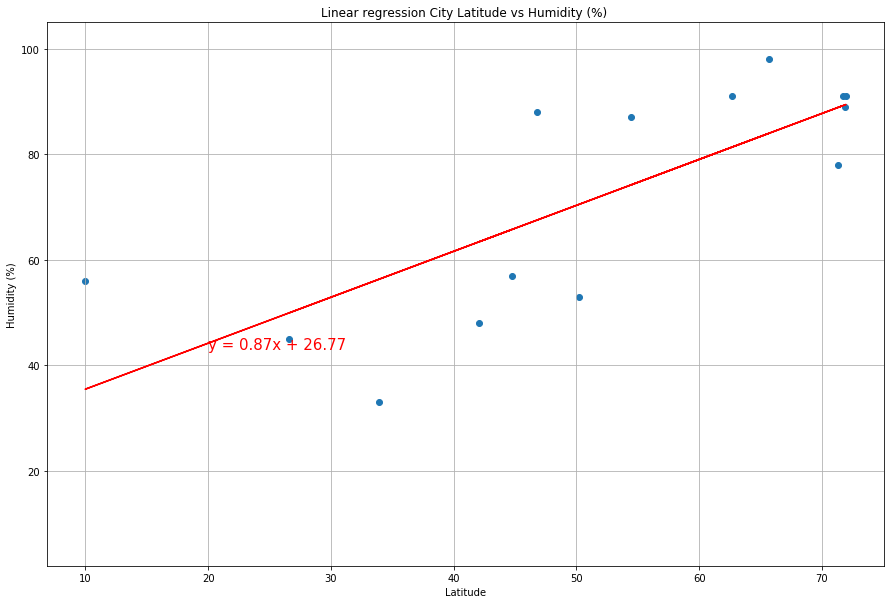

In [80]:
regress_for_me_plese("Latitude","Humidity (%)",northern_df)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = -0.07x + 78.15
-54.8
Southern_Hemisphere
The r-squared is: -0.06469343119370505
The regression displays a negative correlation.
In the Southern_Hemisphere, as you move away from the equator the 'Humidity (%)' decreases.


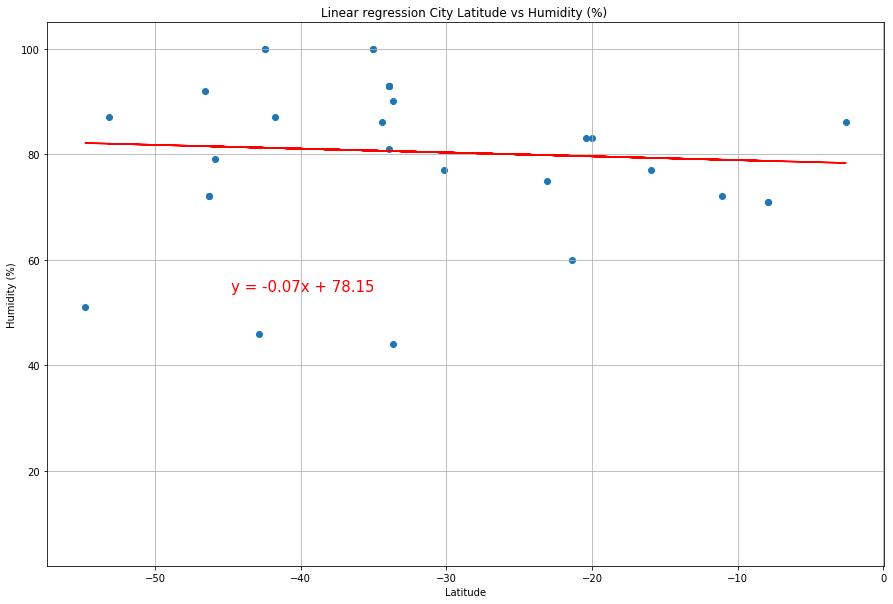

In [81]:
regress_for_me_plese("Latitude","Humidity (%)",southern_df)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.25x + 38.2
9.98
Northern_Hemisphere
The r-squared is: 0.10786796026522381
The regression displays a positive correlation.
In the Northern_Hemisphere, as you move away from the equator the 'Cloudiness (%)' increase.


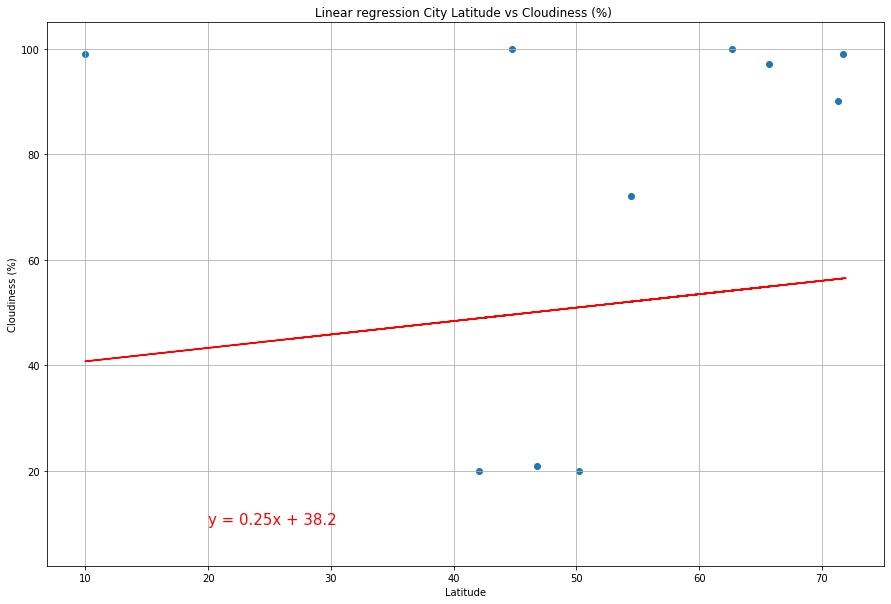

In [82]:
regress_for_me_plese("Latitude","Cloudiness (%)",northern_df)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = -0.4x + 33.22
-54.8
Southern_Hemisphere
The r-squared is: -0.13580761912513006
The regression displays a negative correlation.
In the Southern_Hemisphere, as you move away from the equator the 'Cloudiness (%)' decreases.


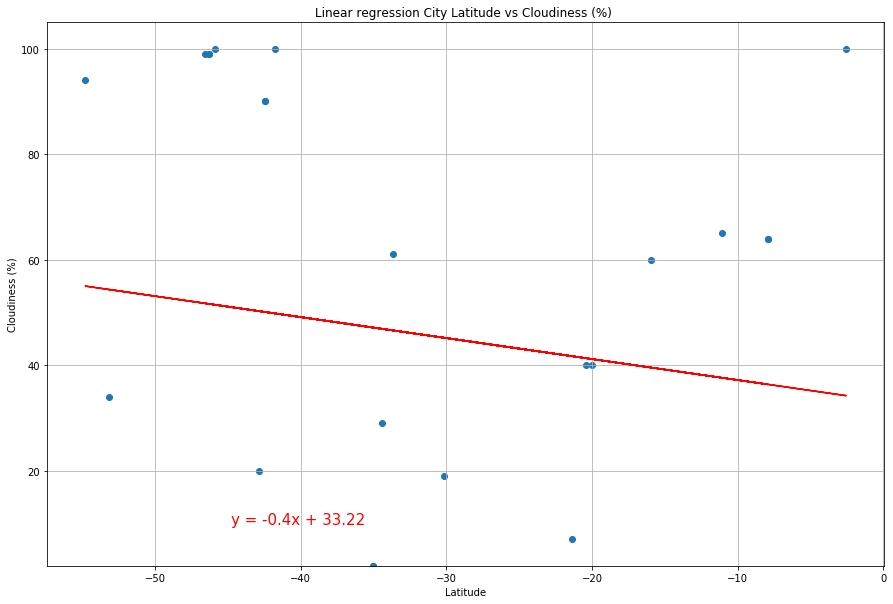

In [83]:
regress_for_me_plese("Latitude","Cloudiness (%)",southern_df)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.03x + 11.91
9.98
Northern_Hemisphere
The r-squared is: -0.08073532218899014
The regression displays a negative correlation.
In the Northern_Hemisphere, as you move away from the equator the 'Wind Speed (mph)' decreases.


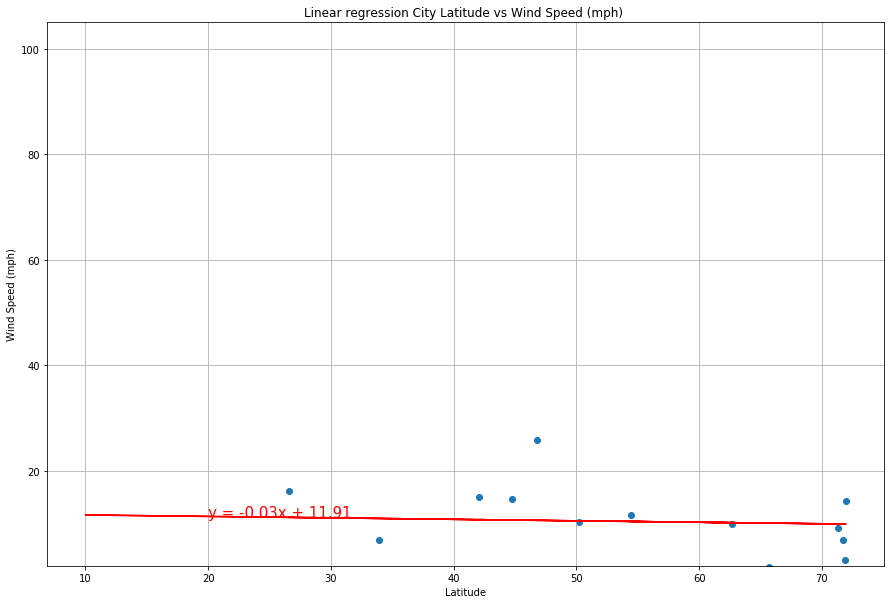

In [84]:
regress_for_me_plese("Latitude","Wind Speed (mph)",northern_df)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.02x + 9.3
-54.8
Southern_Hemisphere
The r-squared is: 0.05183516017369198
The regression displays a positive correlation.
In the Southern_Hemisphere, as you move away from the equator the 'Wind Speed (mph)' increase.


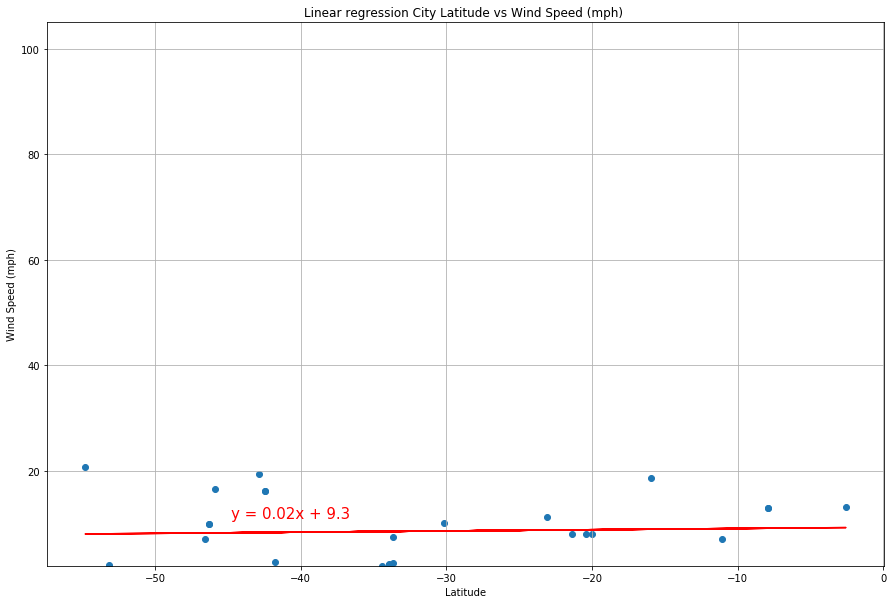

In [85]:
regress_for_me_plese("Latitude","Wind Speed (mph)",southern_df)